In [1]:
!pip install stable-baselines3[extra]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.2/187.2 kB 3.6 MB/s eta 0:00:00


In [2]:
!apt-get update && apt-get install ffmpeg freeglut3-dev xvfb  # For visualization
!pip install "stable-baselines3[extra]>=2.0.0a4"

Hit:1 https://cli.github.com/packages stable InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [83.4 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,153 kB]
Get:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,836 kB]
Hit:13 https://ppa.launchpadcontent.net/ubuntugis

In [20]:
!pip install swig
!pip install gymnasium[box2d]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp312-cp312-linux_x86_64.whl size=2399014 sha256=73b87efa7844333bf6eff5b86a6c619fec491e5092b2aa5d45233bbe294a9a17
  Stored in directory: /root/.cache/pip/wheels/2a/e9/60/774da0bcd07f7dc7761a8590fa2d065e4069568e78dcdc3318
Successfully built box2d-py


In [223]:
import stable_baselines3
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import os
import base64
from pathlib import Path
from IPython import display as ipythondisplay

In [224]:
from stable_baselines3 import DQN
from stable_baselines3.ppo import MlpPolicy
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.results_plotter import load_results, ts2xy, plot_results
from stable_baselines3.common import results_plotter
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.vec_env import VecVideoRecorder
from stable_baselines3.common.env_util import make_vec_env

In [225]:
log_dir = "tmp/"
os.makedirs(log_dir, exist_ok=True)

env = gym.make("LunarLander-v3")
env = Monitor(env, log_dir)

eval_env = make_vec_env("LunarLander-v3", n_envs=1)

callback = EvalCallback(eval_env, best_model_save_path=log_dir, log_path=log_dir, eval_freq=15000, render=False, deterministic=True, n_eval_episodes=20)

model = DQN("MlpPolicy", "LunarLander-v3", verbose=0, tensorboard_log=os.path.join(log_dir, "tensorboard"))


In [226]:
# Random Agent, before training
mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=10, deterministic=True)

print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward:-229.75 +/- 70.89


In [227]:
model.learn(total_timesteps=300_000, callback=callback)
model.save("dqn_lunar")
#plot_results([log_dir], 1000, results_plotter.X_TIMESTEPS, "LunarLander-v3")
#plt.show()
del model

Eval num_timesteps=15000, episode_reward=-120.05 +/- 57.92
Episode length: 850.00 +/- 301.98
New best mean reward!
Eval num_timesteps=30000, episode_reward=-173.40 +/- 94.16
Episode length: 542.15 +/- 376.13
Eval num_timesteps=45000, episode_reward=-136.37 +/- 72.18
Episode length: 646.65 +/- 357.75
Eval num_timesteps=60000, episode_reward=-175.93 +/- 86.24
Episode length: 589.90 +/- 313.59
Eval num_timesteps=75000, episode_reward=-66.06 +/- 33.29
Episode length: 975.85 +/- 105.27
New best mean reward!
Eval num_timesteps=90000, episode_reward=-105.91 +/- 21.41
Episode length: 1000.00 +/- 0.00
Eval num_timesteps=105000, episode_reward=-108.46 +/- 25.44
Episode length: 1000.00 +/- 0.00
Eval num_timesteps=120000, episode_reward=-92.12 +/- 26.61
Episode length: 1000.00 +/- 0.00
Eval num_timesteps=135000, episode_reward=-92.72 +/- 24.50
Episode length: 1000.00 +/- 0.00
Eval num_timesteps=150000, episode_reward=-92.03 +/- 29.14
Episode length: 1000.00 +/- 0.00
Eval num_timesteps=165000, epis

/usr/local/lib/python3.12/dist-packages/stable_baselines3/common/vec_env/vec_video_recorder.py:155: UserWarning: WARN: Unable to save last video! Did you call close()?
  logger.warn("Unable to save last video! Did you call close()?")


Eval num_timesteps=300000, episode_reward=38.00 +/- 118.72
Episode length: 605.80 +/- 380.49
New best mean reward!


In [228]:
model = DQN.load("dqn_lunar")

mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=20)

print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward:1.94 +/- 105.27


In [230]:
os.system("Xvfb :1 -screen 0 1024x768x24 &")
os.environ['DISPLAY'] = ':1'

In [231]:
def show_videos(video_path="", prefix=""):
    """
    Taken from https://github.com/eleurent/highway-env

    :param video_path: (str) Path to the folder containing videos
    :param prefix: (str) Filter the video, showing only the only starting with this prefix
    """
    html = []
    for mp4 in Path(video_path).glob("{}*.mp4".format(prefix)):
        video_b64 = base64.b64encode(mp4.read_bytes())
        html.append(
            """<video alt="{}" autoplay
                    loop controls style="height: 400px;">
                    <source src="data:video/mp4;base64,{}" type="video/mp4" />
                </video>""".format(
                mp4, video_b64.decode("ascii")
            )
        )
    ipythondisplay.display(ipythondisplay.HTML(data="<br>".join(html)))

In [232]:
def record_video(env_id, model, video_length=3000, prefix="", video_folder="videos/"):
    """
    :param env_id: (str)
    :param model: (RL model)
    :param video_length: (int)
    :param prefix: (str)
    :param video_folder: (str)
    """
    eval_env = make_vec_env("LunarLander-v3", n_envs=1, seed=0)
    # Start the video at step=0 and record 500 steps
    eval_env = VecVideoRecorder(
        eval_env,
        video_folder=video_folder,
        record_video_trigger=lambda step: step == 0,
        video_length=video_length,
        name_prefix=prefix,
    )

    obs = eval_env.reset()
    for _ in range(video_length):
        action, _ = model.predict(obs)
        obs, _, _, _ = eval_env.step(action)

    # Close the video recorder
    eval_env.close()

In [233]:
best_model_path = os.path.join(log_dir, "best_model.zip")
best_model = DQN.load(best_model_path, env=env)

mean_reward, std_reward = evaluate_policy(best_model, env, n_eval_episodes=20)
print(f"Best Model - Mean reward: {mean_reward:.2f} +/- {std_reward:.2f}")

record_video("LunarLander-v3", best_model, video_length=3000, prefix="DQN-LunarLander")

Best Model - Mean reward: 28.94 +/- 103.00
Saving video to /content/videos/DQN-LunarLander-step-0-to-step-3000.mp4
Moviepy - Building video /content/videos/DQN-LunarLander-step-0-to-step-3000.mp4.
Moviepy - Writing video /content/videos/DQN-LunarLander-step-0-to-step-3000.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/DQN-LunarLander-step-0-to-step-3000.mp4


In [234]:
show_videos("videos", prefix="DQN")

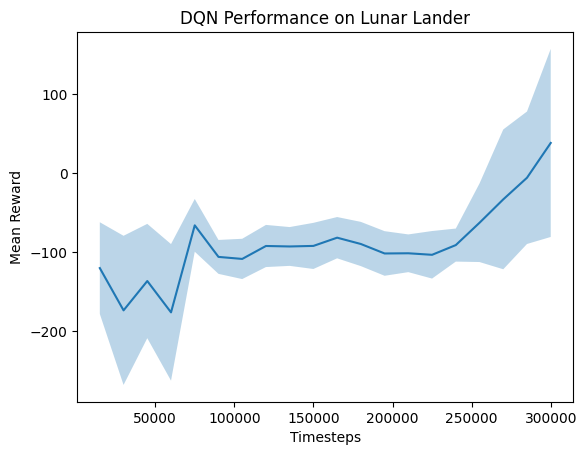

In [235]:
from IPython.core.prefilter import PrefilterHandler
# Load the evaluations.npz file
data = np.load(os.path.join(log_dir, "evaluations.npz"))

# Extract the relevant data
timesteps = data['timesteps']
results = data['results']

# Calculate the mean and standard deviation of the results
mean_results = np.mean(results, axis=1)
std_results = np.std(results, axis=1)

# Plot the results
plt.figure()
plt.plot(timesteps, mean_results)
plt.fill_between(timesteps,mean_results - std_results,mean_results + std_results,alpha=0.3)

plt.xlabel('Timesteps')
plt.ylabel('Mean Reward')
plt.title("DQN Performance on Lunar Lander")
plt.savefig(os.path.join(log_dir, "DQN_Lunar_Lander_performance.png"))
plt.show()